<a href="https://colab.research.google.com/github/hinda-mt/hinda-mt/blob/main/1Supervised_Learning_Regression_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
kcdata=pd.read_csv('kc_house_data.csv')

In [ ]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

This is dataset containing over 21613 houses and their characteristics, the goal is to find the best model to predict a house’s price

#Instructions

1.Explore this dataset using what you have learned in data preprocessing and data visualization 

2.Write a paragraph selecting the most important features (feature selection).

3.Split your dataset into a training set and a testing set. 

4.Apply Linear regression to your training set. 

5.Plot the linear regression. 

6.Measure the performance of linear regression using the testing set.(But beware of inderfitting, don't increase the number of variables too much) 

7.Apply multi-linear regression and compare it to the linear model (But beware of overfitting, don't increase the number of variables too much).

**henda search for internet search engine
web scrabing <html>
data visua with api 
qyerying using file.sqlite**

**unstructured data : image , videos, survey 
structured : 2d frame**


In [ ]:
kcdata

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#library(lubridate)
#as_datetime(date)
##[1] "2014-10-13 UTC"

First thing to do is  checking if our dataframe is clean or not ! 

In [ ]:
kcdata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
kcdata.describe() #youtube

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
var1=kcdata['bedrooms'].isnull().sum() # returns 0 # contradiction ! ther's no house with no bathroom or bedroom
var2=kcdata['bathrooms'].isnull().sum()# returns 0 

In [ ]:
kcdata.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

so we Wanna predict the price of each house based on one or more characteristic.

Normally we  check for the area('grade & condition'),'sqft_living','sqft_lot', 'sqft_above' ,  nbr of floors , Latitude ,  longitude and HOW MANY BEDROOMS we have ?


In [ ]:
features=x=kcdata[['floors','sqft_living','grade','sqft_above','sqft_lot','condition','lat','long']] 

In [ ]:
features

,floors,sqft_living,grade,sqft_above,sqft_lot,condition,lat,long
0,1.0,1180,7,1180,5650,3,47.5112,-122.257
1,2.0,2570,7,2170,7242,3,47.7210,-122.319
2,1.0,770,6,770,10000,3,47.7379,-122.233
3,1.0,1960,7,1050,5000,5,47.5208,-122.393
4,1.0,1680,8,1680,8080,3,47.6168,-122.045
...,...,...,...,...,...,...,...,...
21608,3.0,1530,8,1530,1131,3,47.6993,-122.346
21609,2.0,2310,8,2310,5813,3,47.5107,-122.362
21610,2.0,1020,7,1020,1350,3,47.5944,-122.299
21611,2.0,1600,8,1600,2388,3,47.5345,-122.069


#Spliting this dataset into a training set and a testing set. 


In [ ]:
kcdata['price'].corr(kcdata['sqft_living']) #0.7 is indicating a strong relationship between price and sqft_living.

0.7020350546118003

In [ ]:
from sklearn.model_selection import train_test_split

X=kcdata[['sqft_living']] #target
y=kcdata[['price']]  # choose one feature


X_train, X_test, y_train, y_test =train_test_split (x,y,test_size=0.20, random_state=30)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

#build linear regression model 
model = LinearRegression() 

model.fit(X_train, y_train) #fitting the training data
#testing our model’s performance
predicted = model.predict(X_test)

print("RMSE= {:.2f}".format(np.sqrt(mean_squared_error(y_test, predicted))))
print(f"R squared= {metrics.r2_score(y_test, predicted):.2f}")

RMSE= 215932.67
R squared= 0.63


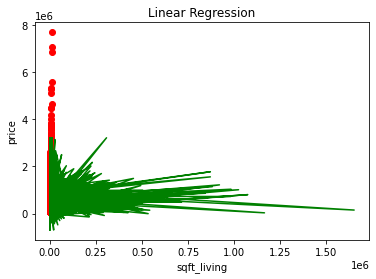

In [ ]:
plt.scatter(X, y, color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel('sqft_living')
plt.plot(x,model.predict(x),color="G")
plt.show()

In [ ]:
#extract x and y from our data
x=kcdata[['floors','sqft_living','grade','sqft_above','sqft_lot','condition','lat','long']]  #we have more than one input
y=kcdata["price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 45860397479.21155
R squared 0.6352107995944225


problem of overfitting r2 63%
mse 458603... $ is a huge diff between predicted and actual 

#You could try to visualize how well your model is performing by comparing actual and predicted values. Assuming that our actual values are stored in Y, and the predicted ones in Y_, we could plot and compare both.
 stron pred : scatter plot 5yr mi corr()
   o ba3d corr()
   
    **countinous + counstous :**
    no5rej b liste of predictors 
    plot b box  o test overlap is good or bad  
    or avec anova testifying our model 
    plot par rapoort gender 
    **cat + countinous **
    **countinous + discrete **: scater plot 
    cat + cat : k square fama relation entr e2 var categorilcal 

 tant que in ty ta3ref chnwa naw3iyet var ili tit3amel m3ahoume .

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


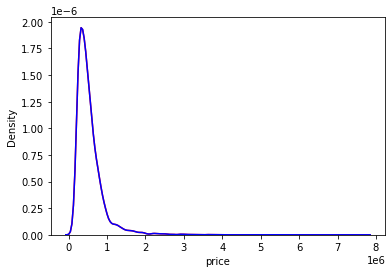

In [ ]:
#https://stackoverflow.com/questions/52404857/how-do-i-plot-for-multiple-linear-regression-model-using-matplotlib
import seaborn as sns

ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y, hist=False, color="b", label="Fitted Values" , ax=ax1)

ValueError: ignored

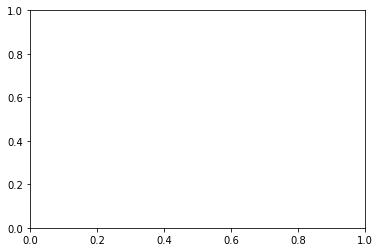

In [ ]:
plt.scatter(x, y, color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel('features')
plt.plot(x,model.predict(x),color="G")
plt.show()

problem of overfitting r2 63% NOSET EME CHWY UNDERFITTING
mse NOSS ... $ is a huge diff between predicted and actual 